In [1]:
import pandas as pd
import numpy as np

In [105]:
Accident0514 = pd.read_csv(r'C:\Users\dbsnail\Downloads\Stats19_Data_2005-2014\Accidents0514.csv',low_memory=False)

In [106]:
Accident0514.shape

(1640597, 32)

In [107]:
Accident0514.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [108]:
Accident0514.Urban_or_Rural_Area.value_counts()

1    1054341
2     586113
3        143
Name: Urban_or_Rural_Area, dtype: int64

In [109]:
## Q 1. What fraction of accidents occur in urban areas? Report the answer in decimal form
Accident0514[Accident0514.Urban_or_Rural_Area == 1 ].shape[0] /Accident0514.shape[0]

0.6426569108684217

In [110]:
##  Q 2. When is the most dangerous time to drive? Find the hour of the day that has the highest occurance of fatal accidents, 
# normalized by the total number of accidents that occured in that hour. For your answer, submit the corresponding frequency 
# of fatal accidents to all accidents in that hour. Note: round accident times down. For example, if an accident occured at 
# 23:55 it occured in hour 23.
# Accident0514.Time[:100]

In [111]:
# Create a column Accident_Hour 
Accident0514['Accident_Hour'] = Accident0514[Accident0514.Time.notnull()].apply(lambda row: int(row['Time'][0:2]), axis=1)

In [112]:
# subset fatal accident
Accident0514_fatal = Accident0514[Accident0514.Accident_Severity==1]
Accident0514_fatal.shape

(21382, 33)

In [127]:
# the hour of the day that has the highest occurance of fatal accidents
Accident0514_fatal['Accident_Hour'].value_counts().sort_values(ascending=False).iloc[:1]  

17.0    True
Name: Accident_Hour, dtype: bool

In [129]:
# frequency of fatal accidents to all accidents in that hour
Accident0514_fatal['Accident_Hour'].value_counts().sort_values(ascending=False).iloc[:1]  / Accident0514[Accident0514['Accident_Hour']==17].shape[0]

17.0    0.010021
Name: Accident_Hour, dtype: float64

In [ ]:
# Q 3. There appears to be a linear trend in the number of accidents that occur each year. What is that trend? Return the 
# slope in units of increased number of accidents per year.

In [130]:
Accident0514['Accident_Year'] = Accident0514.apply(lambda row: int(row['Date'][-4:]), axis=1)

In [135]:
Accident_Year = Accident0514['Accident_Year'].value_counts().sort_index()

In [163]:
y = Accident_Year.values
x = Accident_Year.index

In [191]:
from scipy.stats import linregress
linregress(x, y)[0]

-6511.727272727273

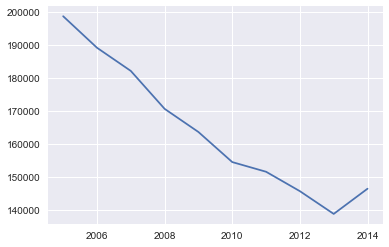

In [167]:
# check the with plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y)

In [ ]:
# Q 4. Do accidents in high-speed-limit areas have more casualties? Compute the Pearson correlation coefficient between the 
# speed limit and the ratio of the number of casualties to accidents for each speed limit. Bin the data by speed limit.

In [185]:
casualties_by_speedlimit = Accident0514.groupby(['Speed_limit']).Number_of_Casualties.sum()

In [187]:
casualties_by_speedlimit

Speed_limit
10         20
15         18
20      20845
30    1335346
40     193141
50      79606
60     399132
70     188612
Name: Number_of_Casualties, dtype: int64

In [190]:
from scipy.stats import pearsonr

pearsonr(casualties_by_speedlimit.index, casualties_by_speedlimit.values)[0]

0.11061296997571551

In [ ]:
# Q 5. How many times more likely are you to be in an accident where you skid, jackknife, or overturn (as opposed to an accident 
# where you don't) when it's raining or snowing compared to nice weather with no high winds? Ignore accidents where the 
# weather is unknown or missing.

In [192]:
Casualties0514 = pd.read_csv(r'C:\Users\dbsnail\Downloads\Stats19_Data_2005-2014\Casualties0514.csv',low_memory=False)

In [193]:
Casualties0514.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00001,1,1,3,1,37,7,2,1,1,0,0,-1,0,1
1,200501BS00002,1,1,2,1,37,7,3,0,0,0,4,-1,11,1
2,200501BS00003,2,1,1,1,62,9,3,0,0,0,0,-1,9,1
3,200501BS00004,1,1,3,1,30,6,3,5,2,0,0,-1,0,1
4,200501BS00005,1,1,1,1,49,8,3,0,0,0,0,-1,3,-1


In [195]:
Casualties0514.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type'],
      dtype='object')

In [194]:
Vehicles0514 = pd.read_csv(r'C:\Users\dbsnail\Downloads\Stats19_Data_2005-2014\Vehicles0514.csv',low_memory=False)
Vehicles0514.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [196]:
Vehicles0514.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type'],
      dtype='object')

In [ ]:
# How many times more likely are accidents involving male car drivers to be fatal compared to accidents involving female 
# car drivers? The answer should be the ratio of fatality rates of males to females. Ignore all accidents where the driver 
# wasn't driving a car.

In [198]:
df = pd.merge(Accident0514, Vehicles0514, on='Accident_Index')
df[df.Accident_Severity==1]['Sex_of_Driver'].value_counts()  #(1 - Male, 2 - Female)

 1    30412
 2     6497
 3     1173
-1        1
Name: Sex_of_Driver, dtype: int64

In [200]:
df[df.Accident_Severity==1]['Sex_of_Driver'].value_counts().iloc[0] / df[df.Accident_Severity==1]['Sex_of_Driver'].value_counts().iloc[1] 

4.6809296598430041

In [ ]:
# We can use the accident locations to estimate the areas of the police districts. Represent each as an ellipse with 
# semi-axes given by a single standard deviation of the longitude and latitude. What is the area, in square kilometers, 
# of the largest district measured in this manner?

In [ ]:
# How fast do the number of car accidents drop off with age? Only consider car drivers who are legally allowed to drive 
# in the UK (17 years or older). Find the rate at which the number of accidents exponentially decays with age. Age is 
# measured in years. Assume that the number of accidents is exponentially distributed with age for driver's over the age of 17.

In [203]:
df[df['Age_of_Driver'] >= 17].Age_of_Driver.value_counts().sort_index()

17     50295
18     75301
19     72661
20     73823
21     68094
22     66836
23     65708
24     64090
25     71316
26     63043
27     60244
28     60409
29     56960
30     77907
31     54529
32     55501
33     54918
34     55121
35     66464
36     55113
37     54533
38     56396
39     56479
40     72334
41     55700
42     56791
43     54444
44     53681
45     58076
46     50180
       ...  
71      9557
72      9130
73      8697
74      8211
75      8212
76      7341
77      6703
78      6565
79      6049
80      6044
81      5001
82      4662
83      4069
84      3703
85      3154
86      2510
87      2001
88      1547
89      1231
90       908
91       621
92       439
93       282
94       201
95       114
96        56
97        37
98        48
99        19
100        2
Name: Age_of_Driver, Length: 84, dtype: int64